In [2]:

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from time import time
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [5]:
df=pd.read_csv("/root/Documents/DATASETS/CC.csv",index_col=0)

In [7]:
df.shape

(284807, 31)

In [78]:
df.Amount.describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

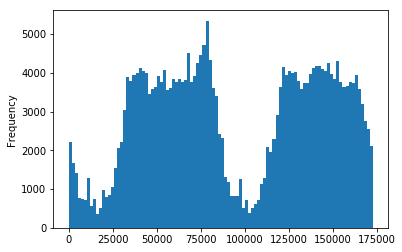

In [6]:
df.Time.plot(kind="hist",bins=100)

In [7]:
pd.np.corrcoef(df.Time,df.Class)
#almost zero there is no coorelation

array([[ 1.        , -0.01232257],
       [-0.01232257,  1.        ]])

In [8]:
df.drop("Time",axis=1,inplace=True)

In [9]:
#df.Amount.plot(kind="hist")
np.corrcoef(df.Amount,df.Class)
#correlation is very less zero it means no correlation

array([[ 1.        ,  0.00563175],
       [ 0.00563175,  1.        ]])

In [10]:
df.drop("Amount",axis=1,inplace=True)

In [11]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
Class    0
dtype: int64

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X=df.drop("Class",axis=1)
y=np.array(df.Class)
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.2)
clflr=LogisticRegression()
clflr.fit(Xtr,ytr)
pred=clflr.predict(Xte)
from sklearn import metrics
print(metrics.accuracy_score(pred,yte)*100)
print(metrics.confusion_matrix(pred,yte))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


99.9332888592
[[56866    31]
 [    7    58]]


In [51]:
pred1=clflr.predict(X)
print("CONFUSION MATRIX\n",metrics.confusion_matrix(pred1,y))
print("\nPRECISION SCORE\n",metrics.precision_score(pred1,y))
print("\nRECALL\n",metrics.recall_score(pred1,y))  #(299)/(299+41)
#precision is very less
#attack prediction is only true 60% of time

CONFUSION MATRIX
 [[284275    193]
 [    40    299]]

PRECISION SCORE
 0.607723577236

RECALL
 0.882005899705


In [46]:
#undersampling under
from imblearn.under_sampling import RandomUnderSampler
us=RandomUnderSampler(ratio=0.7)
Xtru,ytru=us.fit_sample(Xtr,ytr)
c1=Xtru[ytru==1]
c2=Xtru[ytru==0]
clflru=LogisticRegression()
clflru.fit(Xtru,ytru)
predu=clflru.predict(Xtru)
print("CONFUSION MATRIX",metrics.confusion_matrix(predu,ytru),"\n")
print(metrics.classification_report(predu,ytru))

CONFUSION MATRIX [[571  33]
 [  7 372]] 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       604
           1       0.92      0.98      0.95       379

   micro avg       0.96      0.96      0.96       983
   macro avg       0.95      0.96      0.96       983
weighted avg       0.96      0.96      0.96       983



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
#prediction on main dataset
predu2=clflru.predict(X)
print(metrics.confusion_matrix(predu2,y))
print(metrics.recall_score(predu2,y))

[[276804     43]
 [  7511    449]]
0.0564070351759


In [53]:
#oversampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
os=RandomOverSampler(ratio=0.7)
Xtro,ytro=os.fit_sample(Xtr,ytr)
c1=Xtro[ytro==1]
c2=Xtro[ytro==0]
clflro=DecisionTreeClassifier()
clflro.fit(Xtro,ytro)
pred=clflro.predict(Xte)
print("CONFUSION METRICS\n",metrics.confusion_matrix(pred,yte))
print("\nCLASSIFICATION REPORT\n",metrics.classification_report(pred,yte))

CONFUSION METRICS
 [[56849    27]
 [   26    60]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56876
           1       0.69      0.70      0.69        86

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.84      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [54]:
pred=clflro.predict(X)
print(metrics.confusion_matrix(pred,y))
print(metrics.classification_report(pred,y))

[[284289     27]
 [    26    465]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284316
           1       0.95      0.95      0.95       491

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.97      0.97      0.97    284807
weighted avg       1.00      1.00      1.00    284807



In [55]:
sm=SMOTE(sampling_strategy=0.6)
Xtrsm,ytrsm=sm.fit_sample(Xtr,ytr)
c0=Xtrsm[ytrsm==0]
c1=Xtrsm[ytrsm==1]
print(len(c0),len(c1))
clfsm=DecisionTreeClassifier()
clfsm.fit(Xtrsm,ytrsm)
pred=clfsm.predict(Xte)
print("CONFUSION METRICS\n",metrics.confusion_matrix(pred,yte))
print("\nCLASSIFICATION REPORT\n",metrics.classification_report(pred,yte))

227440 136464
CONFUSION METRICS
 [[56738    20]
 [  137    67]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56758
           1       0.77      0.33      0.46       204

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.88      0.66      0.73     56962
weighted avg       1.00      1.00      1.00     56962



In [56]:
pred=clfsm.predict(X)
print("CONFUSION METRICS\n",metrics.confusion_matrix(pred,y))
print("\nCLASSIFICATION REPORT\n",metrics.classification_report(pred,y))

CONFUSION METRICS
 [[284178     20]
 [   137    472]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284198
           1       0.96      0.78      0.86       609

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.98      0.89      0.93    284807
weighted avg       1.00      1.00      1.00    284807



In [14]:
t0=time()
k=0.5
while k<=1:
    sm=SMOTE(sampling_strategy=k)
    Xtrsm,ytrsm=sm.fit_sample(Xtr,ytr)
    c0=Xtrsm[ytrsm==0]
    c1=Xtrsm[ytrsm==1]
    print(len(c0),len(c1))
    adap=RandomForestClassifier(n_estimators=10)
    #adap=AdaBoostClassifier(base_estimator=clfsm,n_estimators=10)
    adap.fit(Xtrsm,ytrsm)
    pred=adap.predict(Xte)
    print("K=",k)
    print("\nCONFUSION METRICS\n",metrics.confusion_matrix(pred,yte))
    print("\nCLASSIFICATION REPORT\n",metrics.classification_report(pred,yte))
    tn=time()-t0
    print(tn)
    print("-"*100)
    k=k+0.1

227457 113728
K= 0.5

CONFUSION METRICS
 [[56843    14]
 [   15    90]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.87      0.86      0.86       105

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.93      0.93      0.93     56962
weighted avg       1.00      1.00      1.00     56962

26.74648952484131
----------------------------------------------------------------------------------------------------
227457 136474
K= 0.6

CONFUSION METRICS
 [[56845    14]
 [   13    90]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56859
           1       0.87      0.87      0.87       103

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.93      0.94      0.93     56962
weighted avg       1.00      1.00      1.00     56962

54.03240442276001
-----------------

In [74]:
sm=SMOTE(sampling_strategy=0.7)
Xtrsm,ytrsm=sm.fit_sample(Xtr,ytr)
c0=Xtrsm[ytrsm==0]
c1=Xtrsm[ytrsm==1]
print(len(c0),len(c1))
clfsm=RandomForestClassifier(n_estimators=15)
adap=AdaBoostClassifier(base_estimator=clfsm,n_estimators=10)
adap.fit(Xtrsm,ytrsm)

227442 159209


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          learning_rate=1.0, n_estimators=10, random_state=None)

In [79]:
pred=adap.predict(X)
print("\nCONFUSION METRICS\n",metrics.confusion_matrix(pred,y))
print("\nCLASSIFICATION REPORT\n",metrics.classification_report(pred,y))
print("-"*100)


CONFUSION METRICS
 [[284300     16]
 [    15    476]]

CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    284316
           1       0.97      0.97      0.97       491

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.98      0.98      0.98    284807
weighted avg       1.00      1.00      1.00    284807

----------------------------------------------------------------------------------------------------


In [29]:
sm=SMOTE(sampling_strategy=0.7)
Xtrsm,ytrsm=sm.fit_sample(Xtr,ytr)
c0=Xtrsm[ytrsm==0]
c1=Xtrsm[ytrsm==1]
print(len(c0),len(c1))
ner=MLPClassifier(activation="relu")
ner.fit(Xtrsm,ytrsm)

227442 159209


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [30]:
pred=ner.predict(X)

In [31]:
print(metrics.classification_report(pred,y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284253
           1       0.97      0.86      0.91       554

   micro avg       1.00      1.00      1.00    284807
   macro avg       0.98      0.93      0.95    284807
weighted avg       1.00      1.00      1.00    284807



In [72]:
print(metrics.confusion_matrix(pred,y))

[[284237     16]
 [    78    476]]


In [71]:
metrics.precision_score(pred,y)

0.96747967479674801

In [70]:
metrics.recall_score(pred,y)

0.8592057761732852